In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import utils
from load_dataset import load_dataset, feature_extraction


data_directory = "/Users/nepal/Documents/synapthesis/synData6July"
lotti_fn = "export_lotti_veneto_2016_2018_giulio_v2.csv"
vincitori_fn = "export_vincitori_veneto_2016_2018_giulio_v2.csv"
procedura_fn = "/Users/nepal/Documents/synapthesis/tipi_procedure.txt"

df = load_dataset(data_directory, lotti_fn, vincitori_fn, procedura_fn)
df = feature_extraction(df)

importo values to substitute:           0.0012%
data_inizio values to substitute:           0.3145%


# abc analysis for award procedures and cpv codes

In [2]:
abc_procedures = [1, 26, 4, 23]
abc_cpv = [33, 45, 85, 79]

procedure_mask = df.id_scelta_contraente == abc_procedures[0]
for item in abc_procedures:
    procedure_mask += df.id_scelta_contraente == item
df = df[procedure_mask]

cpv_mask = df.cpv == abc_cpv[0]
for item in abc_cpv:
    cpv_mask += df.cpv == item
df = df[cpv_mask]

# scatterplots

is the contract duration linearly dependent on the contract amount?

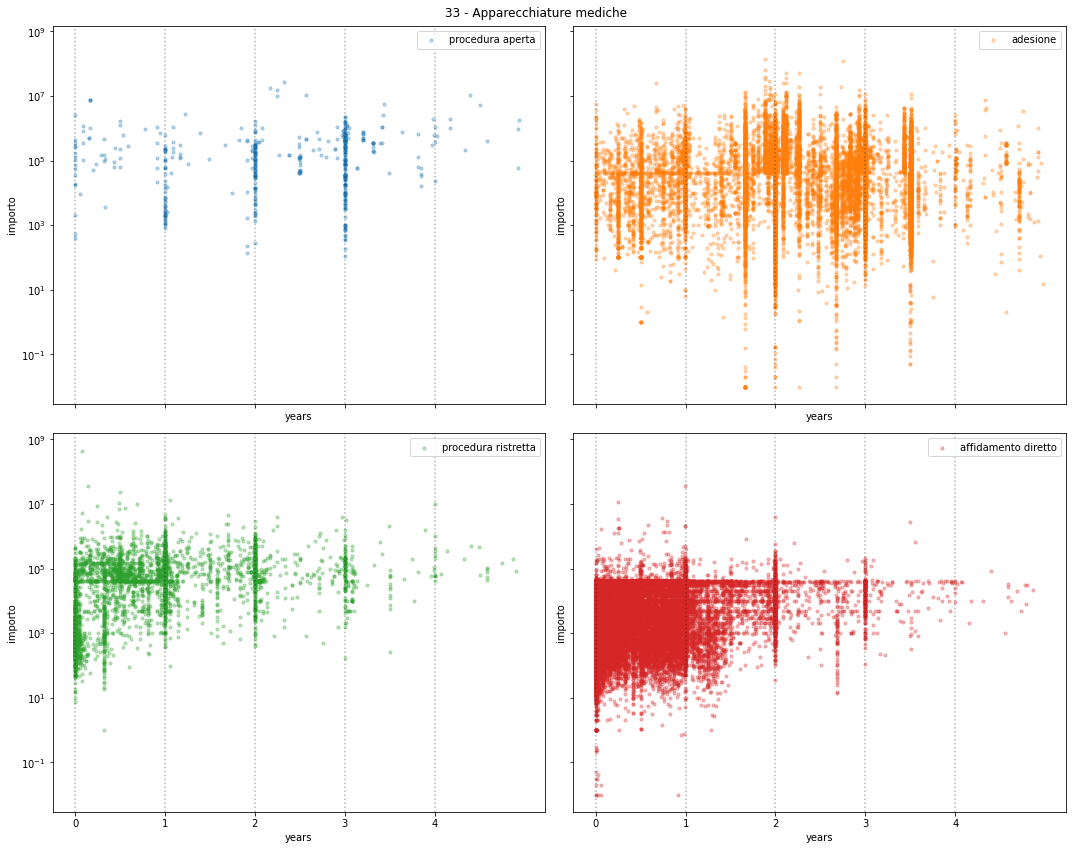

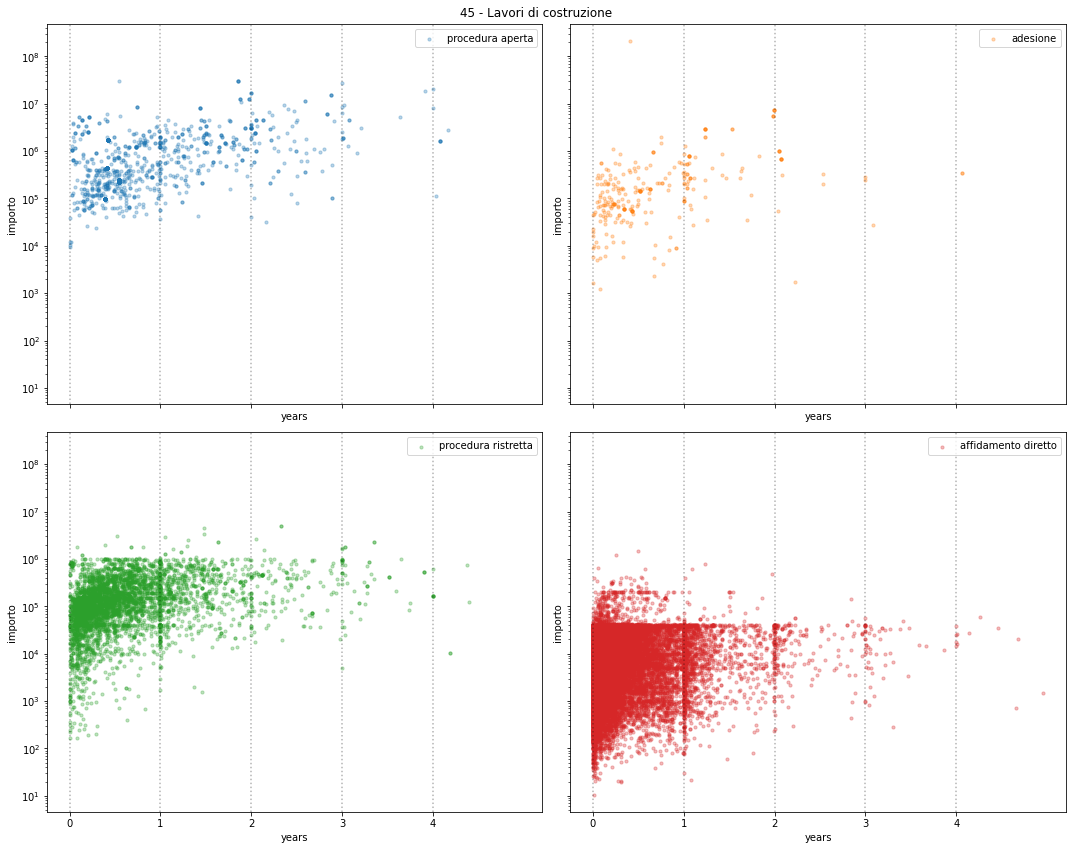

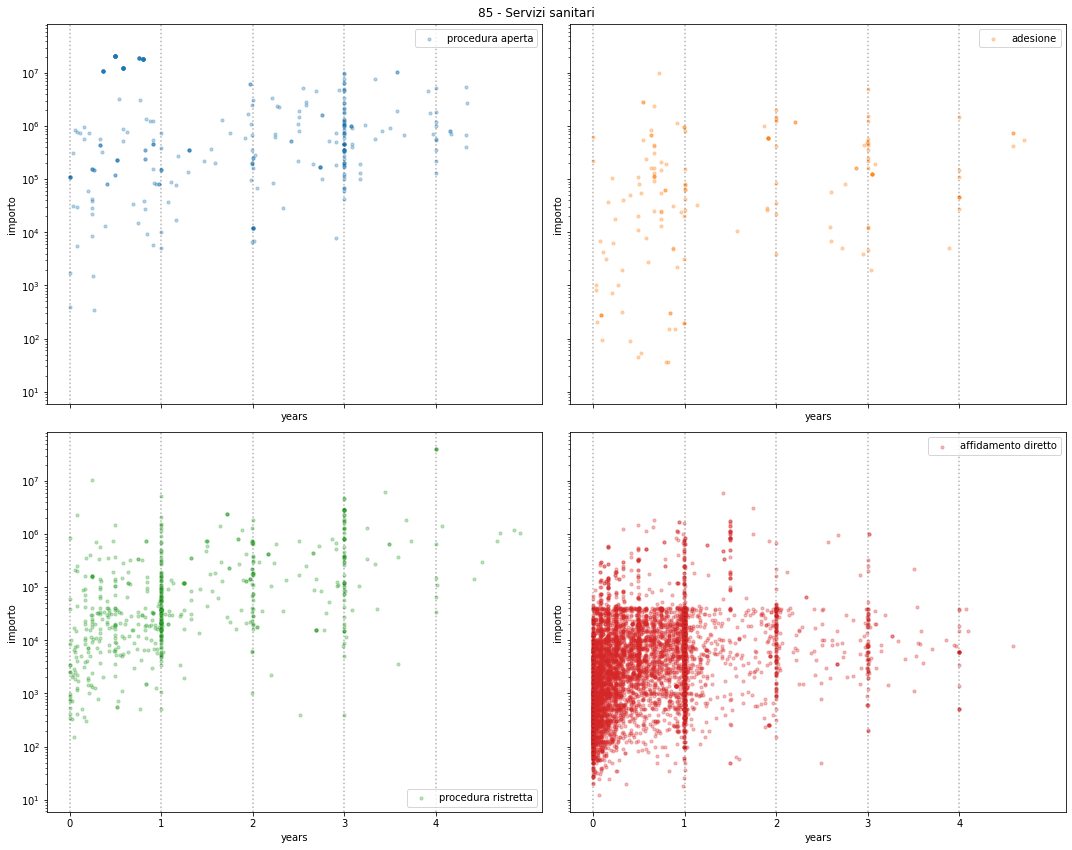

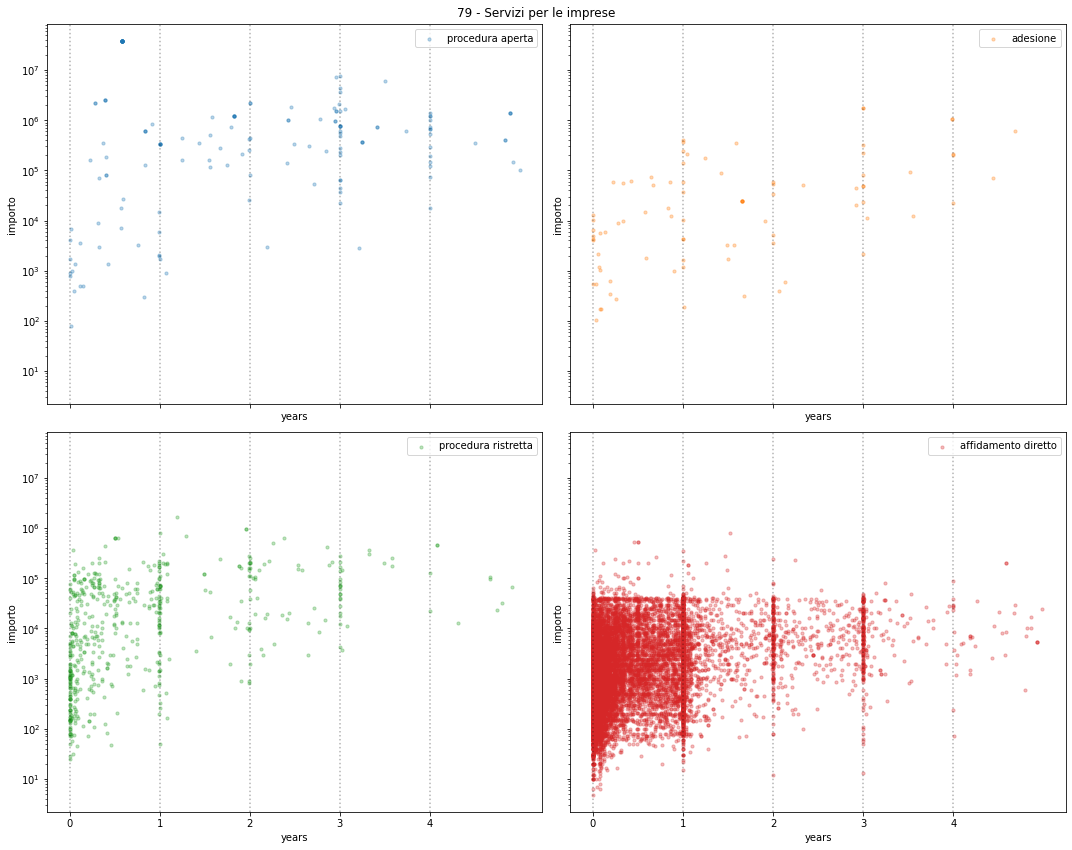

In [3]:
for cpv in abc_cpv:
    utils.scatter_quaternion("durata", "importo", df, cpv, ybound=(0, 8))

the bigger the contract amount, the bigger the business entity?

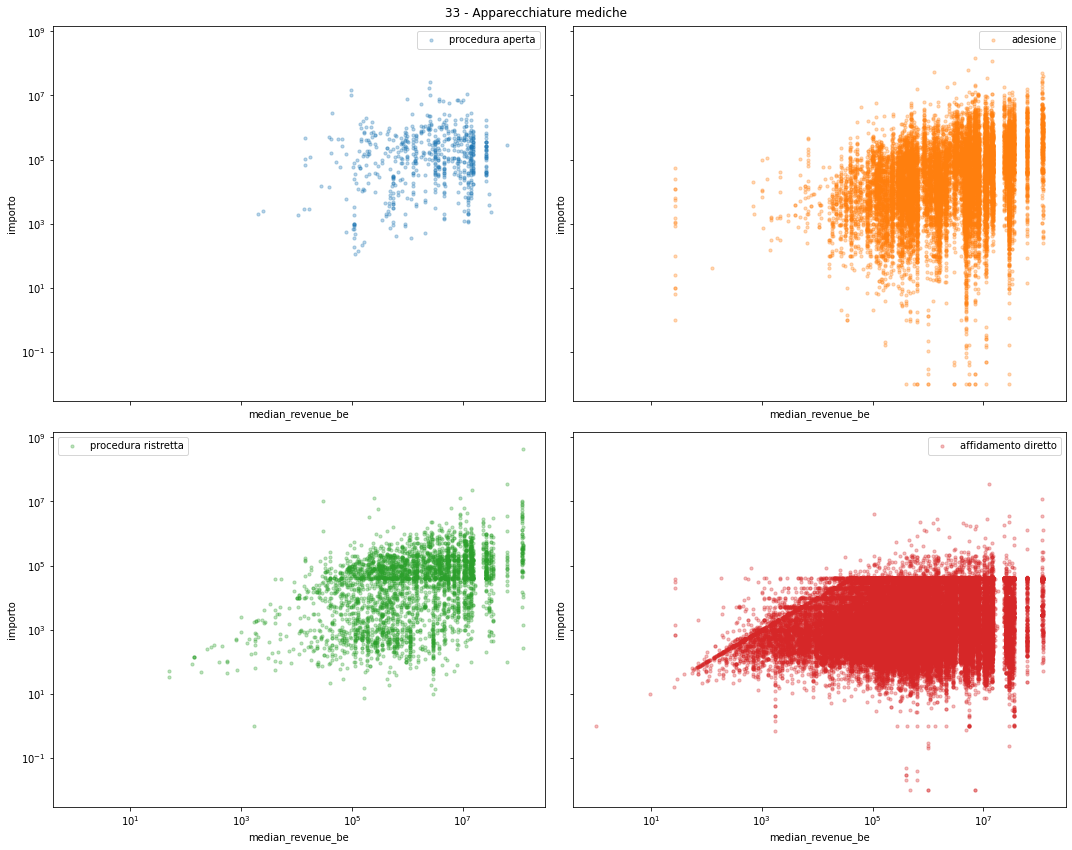

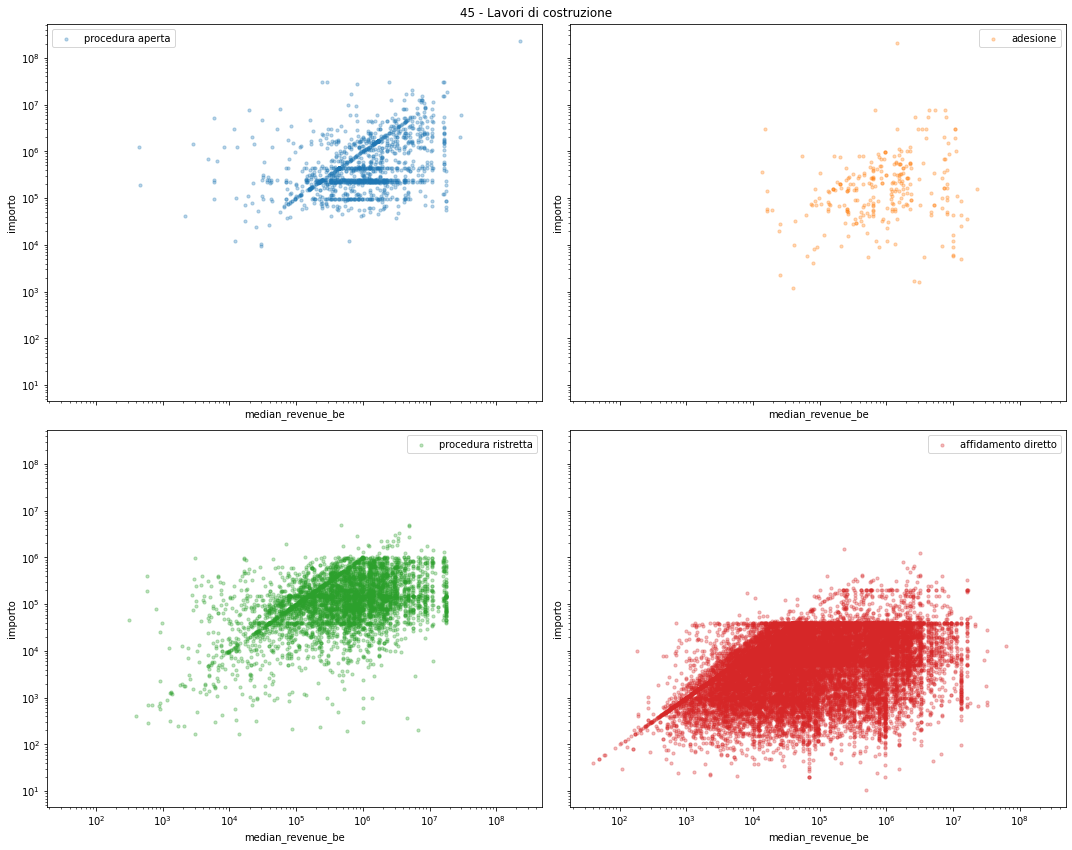

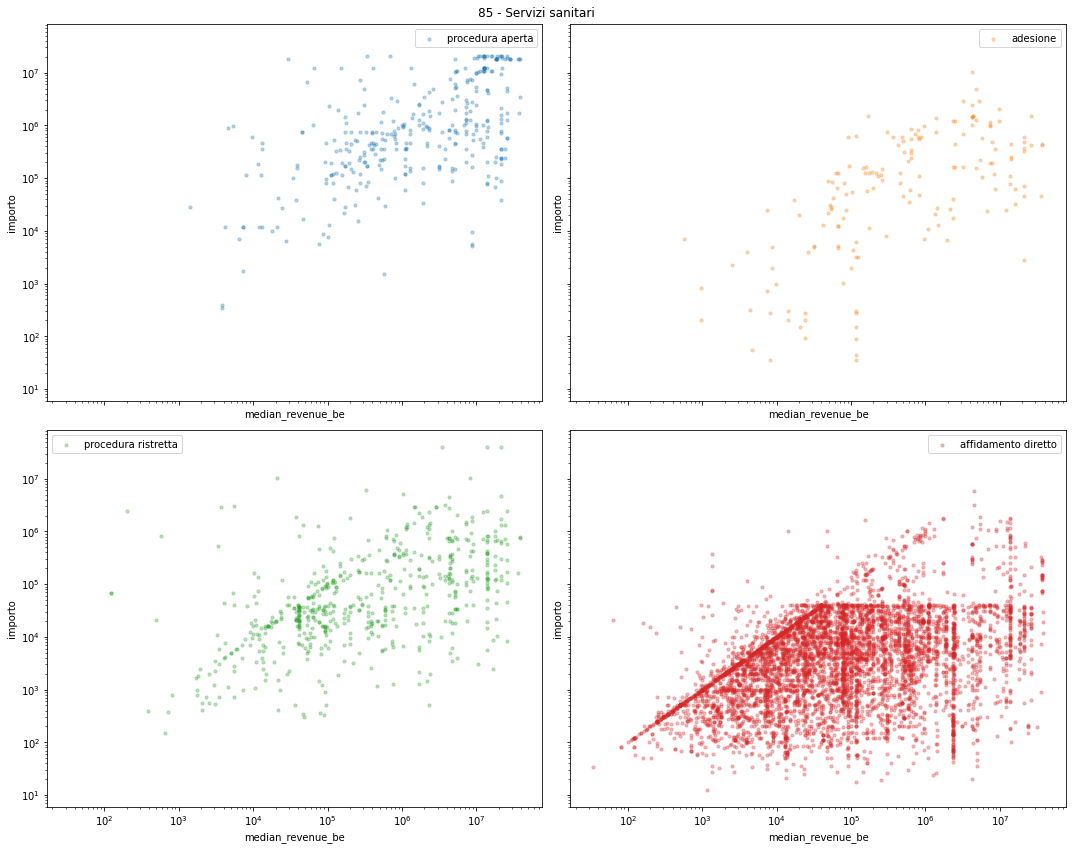

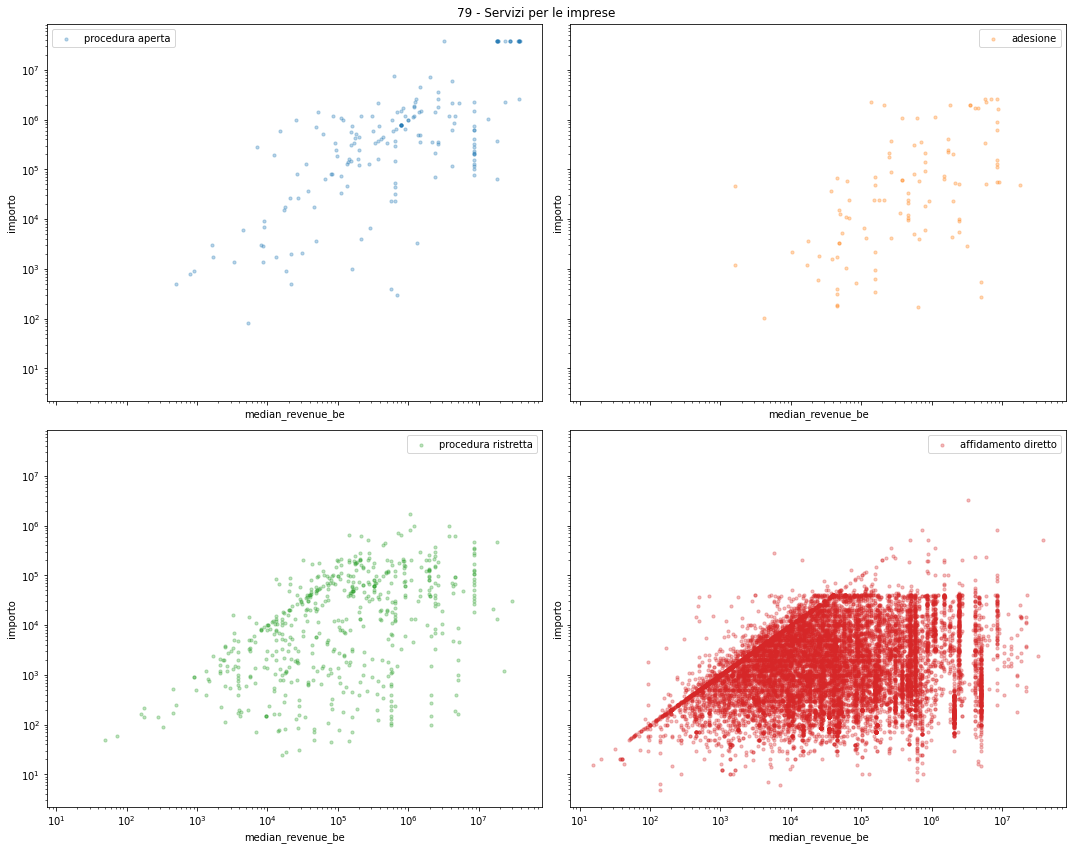

In [4]:
for cpv in abc_cpv:
    utils.scatter_quaternion("median_revenue_be", "importo", df, cpv)

the bigger the contract amount, the bigger the PA median annual expenditure?

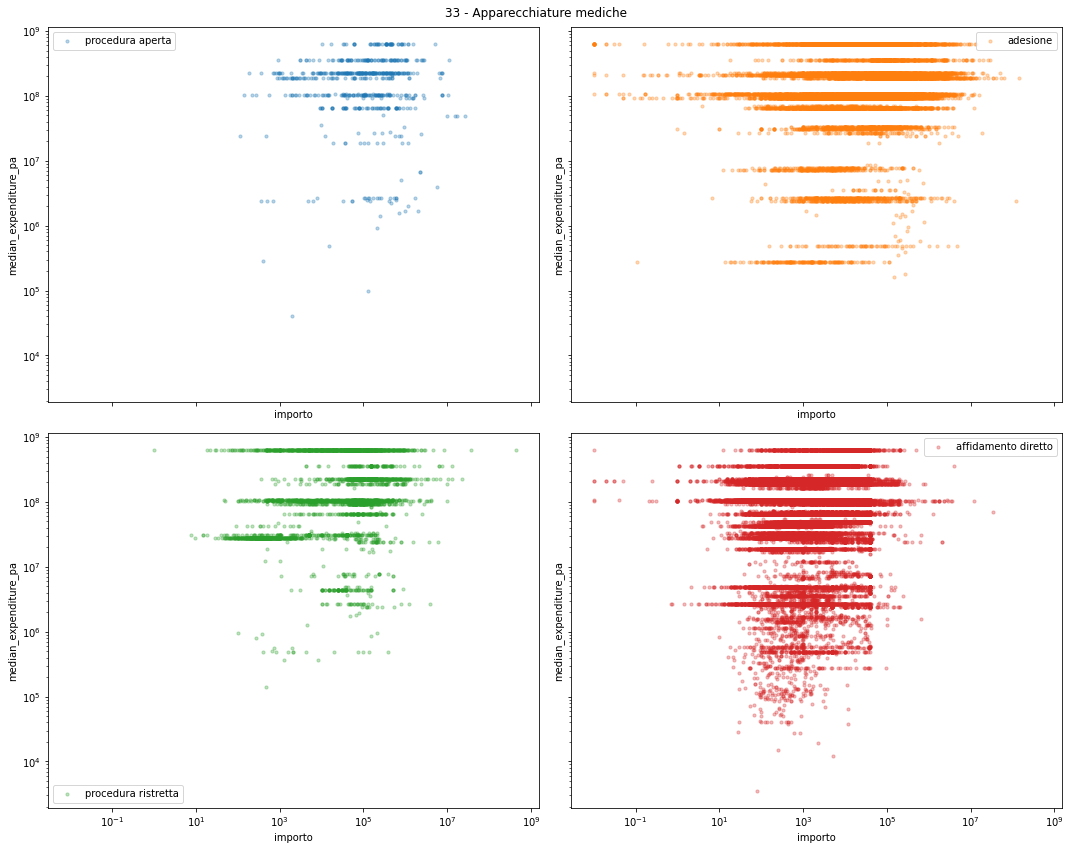

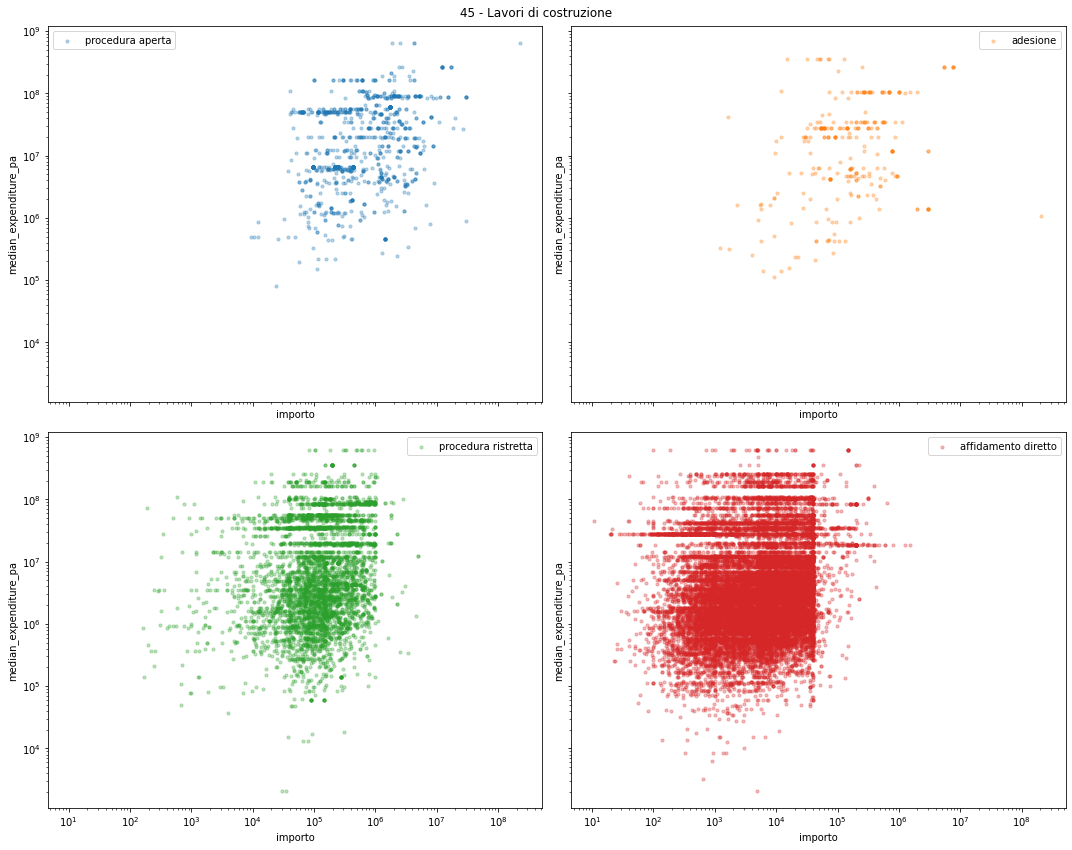

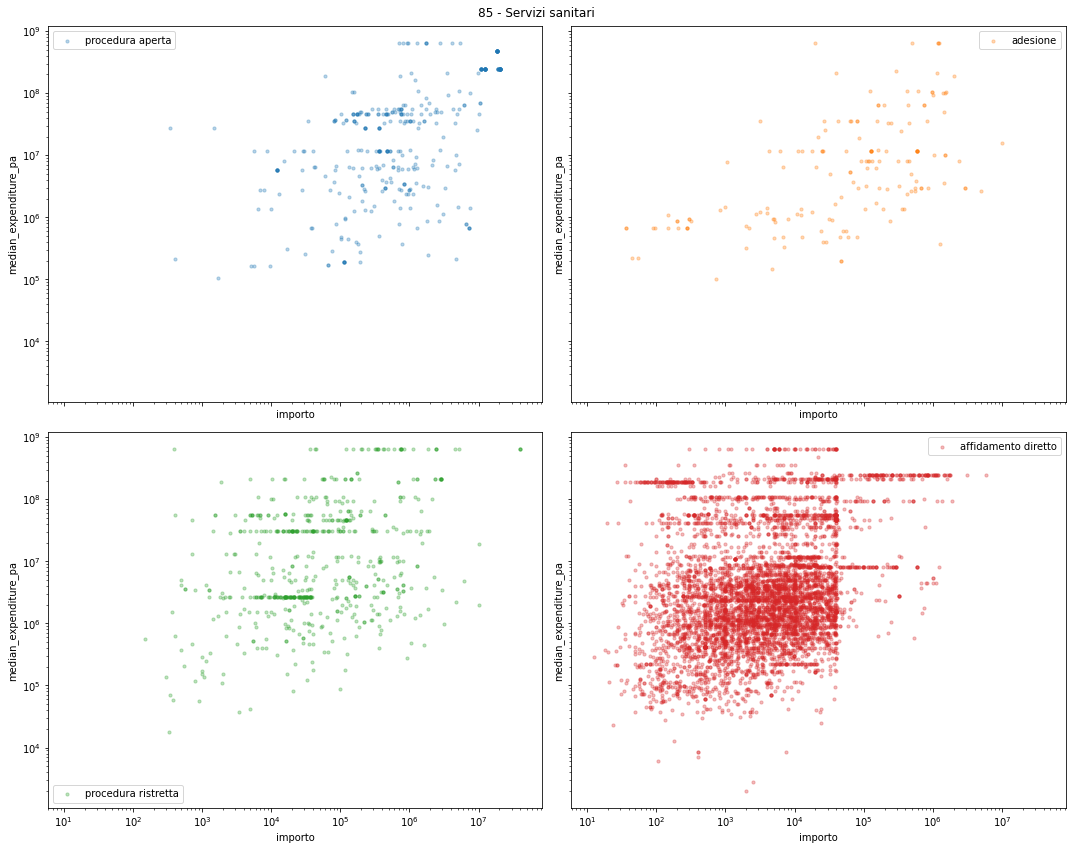

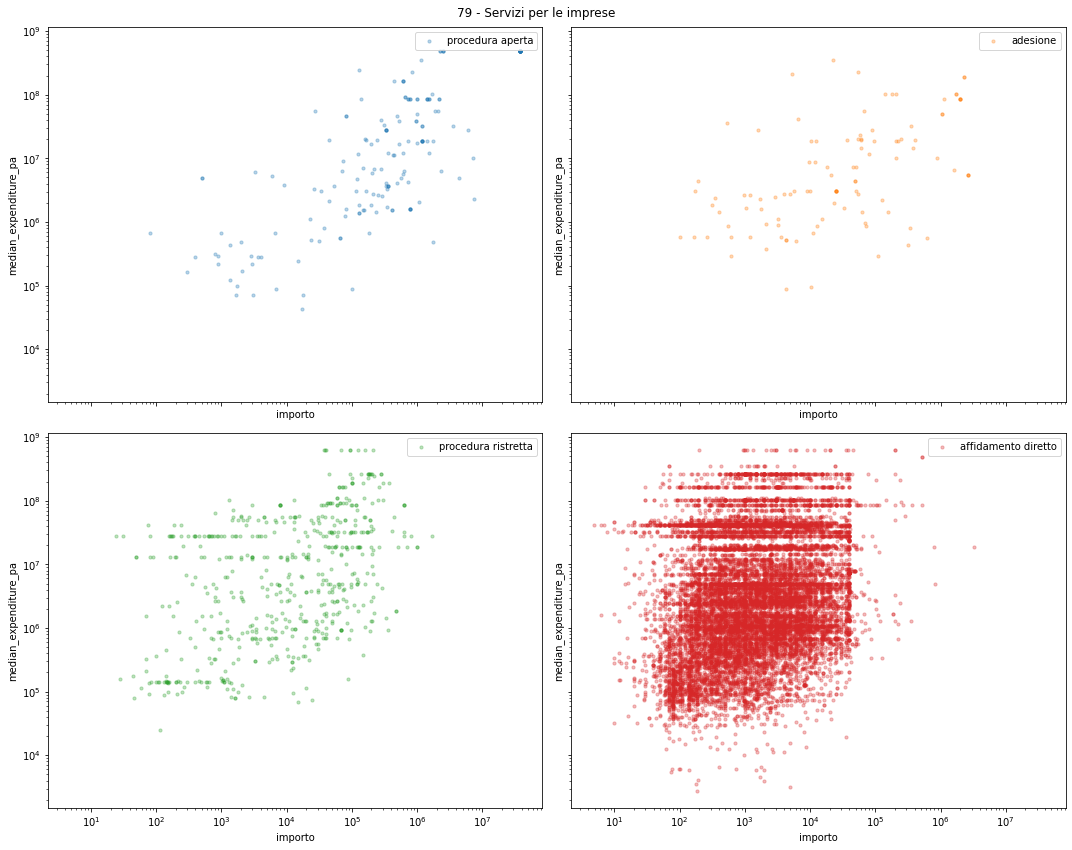

In [7]:
for cpv in abc_cpv:
    utils.scatter_quaternion("importo", "median_expenditure_pa", df, cpv)

do big PAs buy from big business entities?

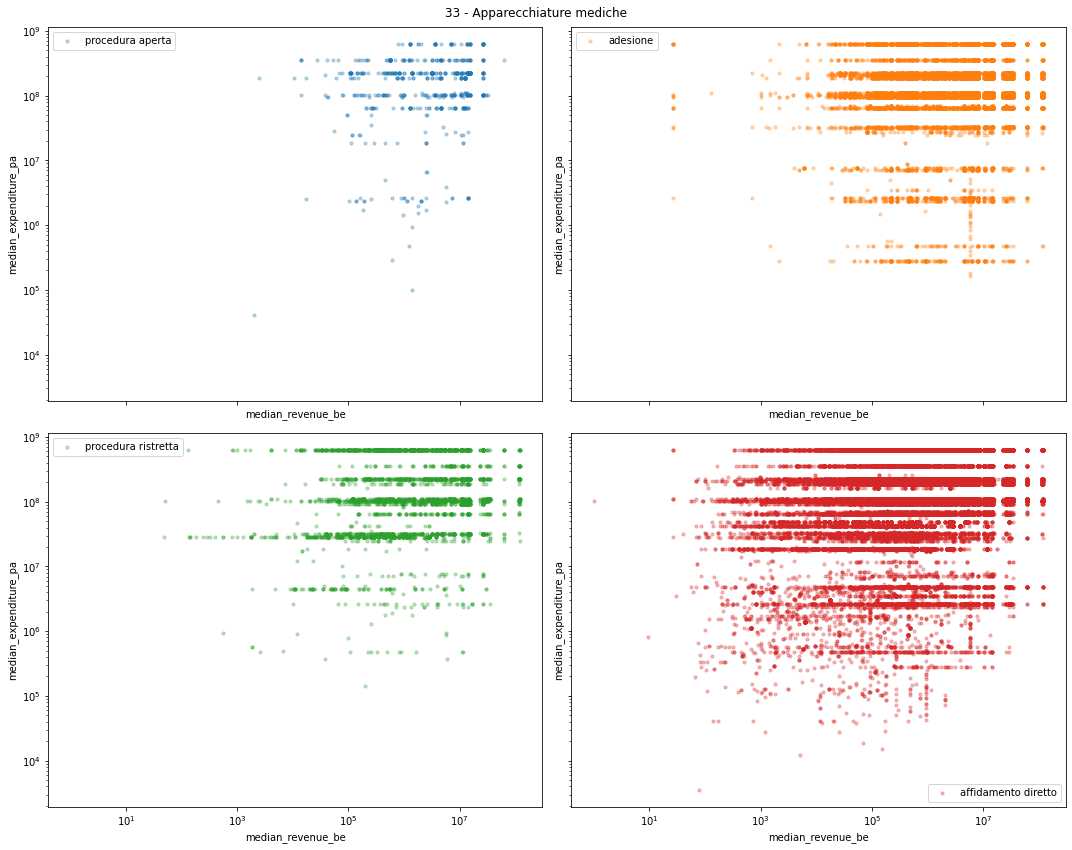

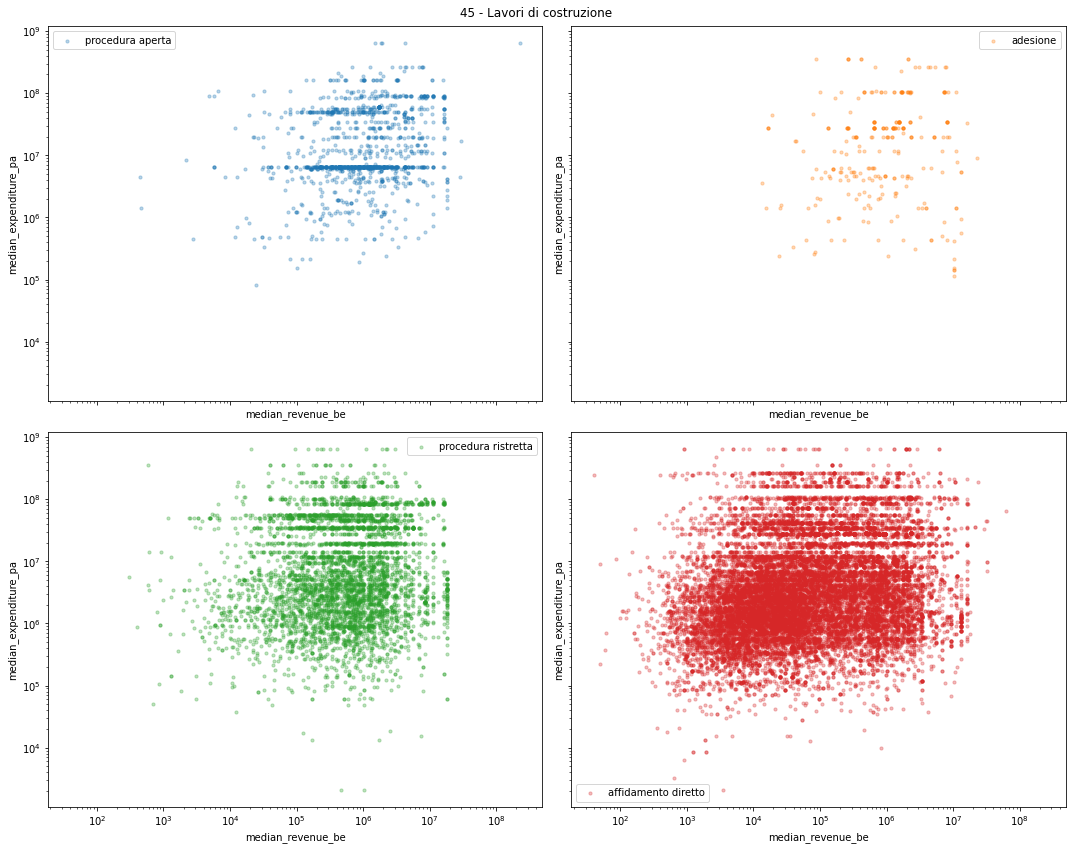

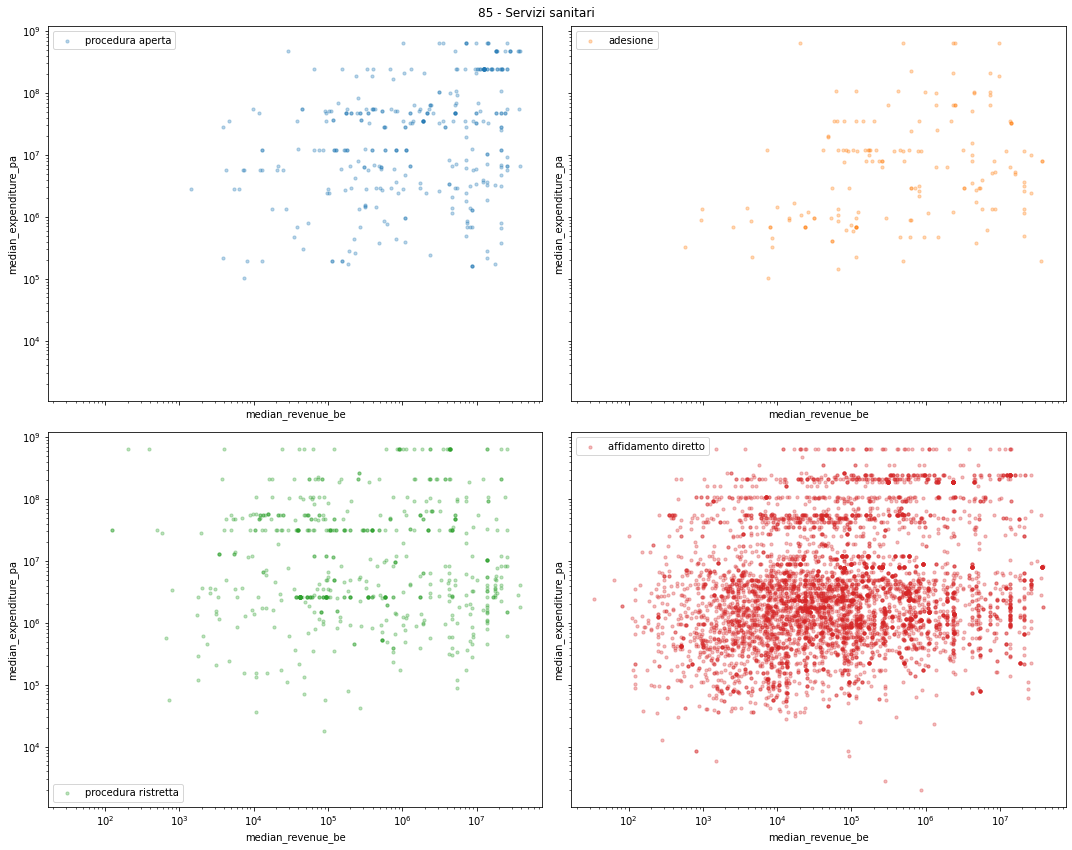

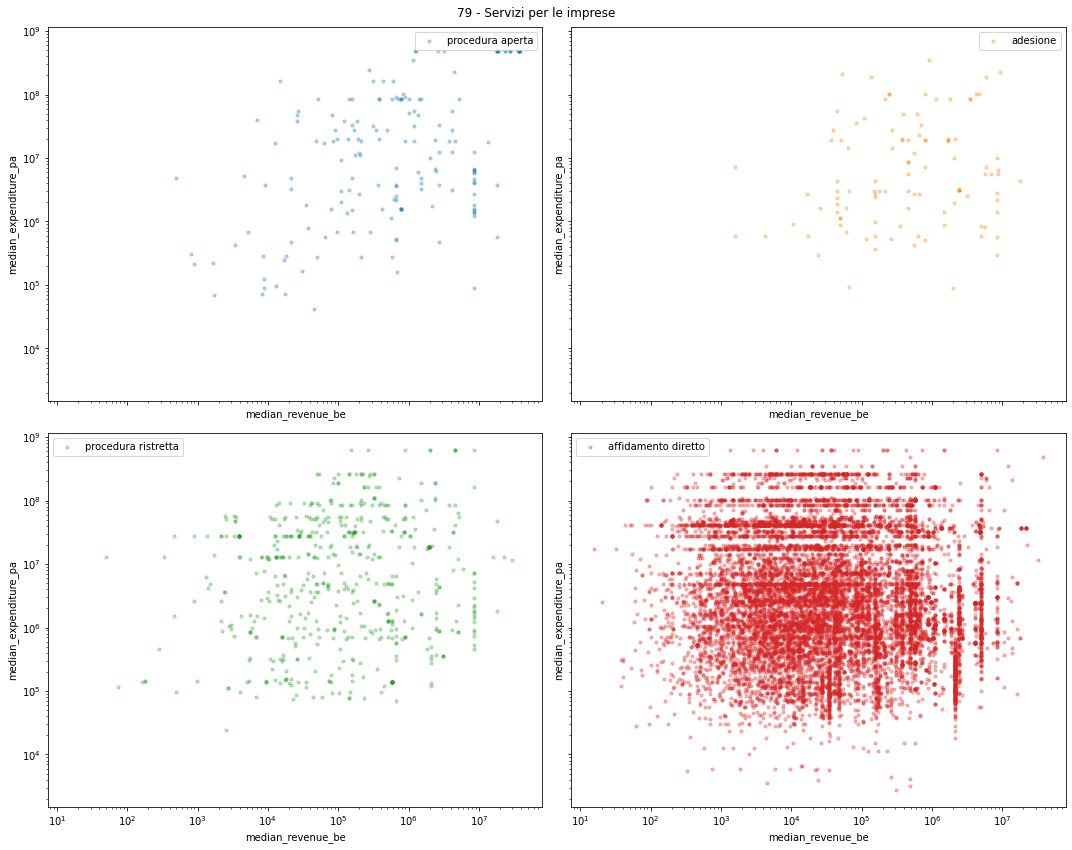

In [5]:
for cpv in abc_cpv:
    utils.scatter_quaternion("median_revenue_be", "median_expenditure_pa", df, cpv)

the bigger the contract amount

# time series

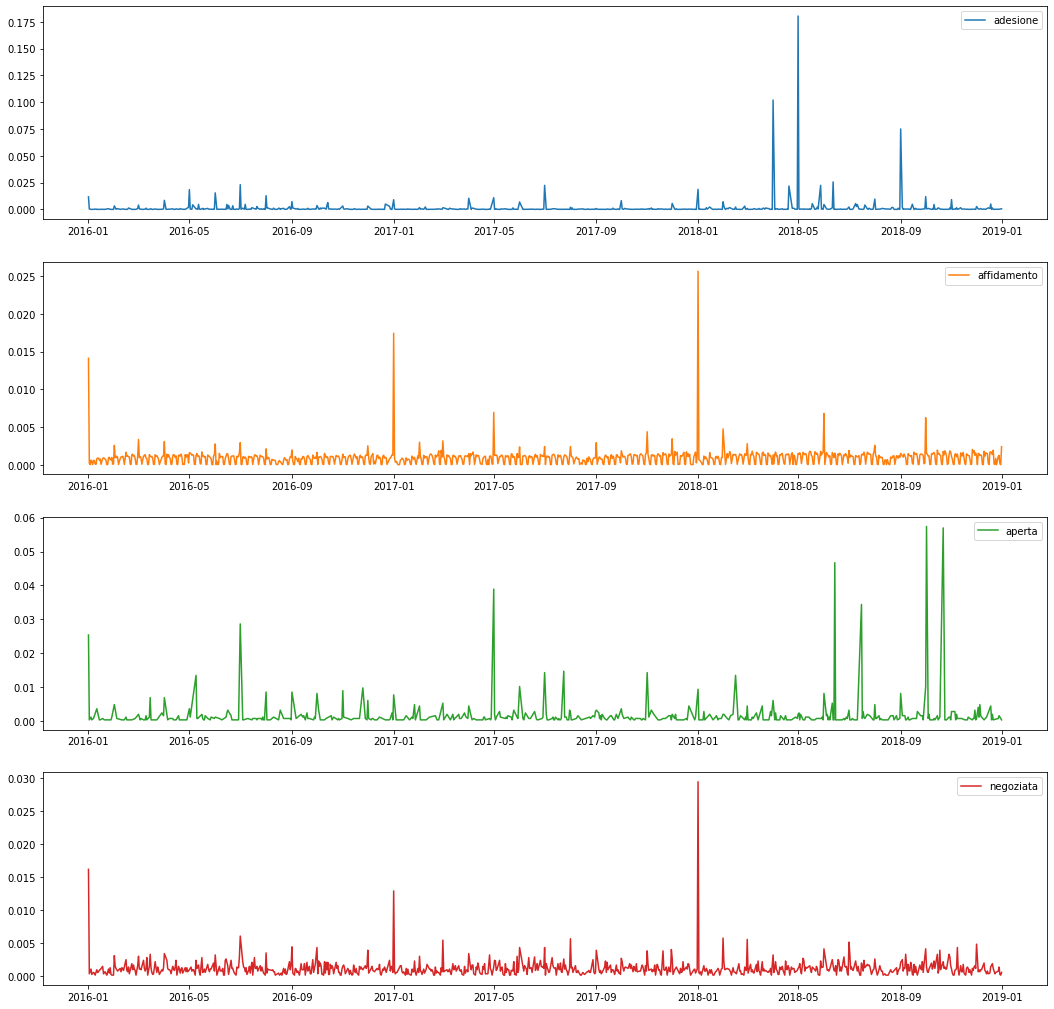

In [10]:
import matplotlib.colors as mcolors
n = len(abc_procedures)
fig, ax = plt.subplots(n, figsize=(6*3, 4.5*n))
for i, (name, group) in enumerate(df.groupby("tipo_procedura")):
    aggr = group.groupby("data_inizio").size()
    ax[i].plot(aggr / aggr.sum() , label=name, c=list(mcolors.TABLEAU_COLORS)[i])
    ax[i].legend()
    i += 1
plt.show()